In [267]:
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import warnings
warnings.filterwarnings("ignore")

import seaborn as sns
from scipy import stats


from sklearn.model_selection import train_test_split
import sklearn.preprocessing
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report




In [2]:
#create first df
df1 = pd.read_csv('cosmetics.csv')

In [3]:
#create second df
df2 = pd.read_csv('cscpopendata.csv')

In [4]:
#take a look at df1
df1.head()

,Label,Brand,Name,Price,Rank,Ingredients,Combination,Dry,Normal,Oily,Sensitive
0,Moisturizer,LA MER,Crème de la Mer,175,4.1,"Algae (Seaweed) Extract, Mineral Oil, Petrolat...",1,1,1,1,1
1,Moisturizer,SK-II,Facial Treatment Essence,179,4.1,"Galactomyces Ferment Filtrate (Pitera), Butyle...",1,1,1,1,1
2,Moisturizer,DRUNK ELEPHANT,Protini™ Polypeptide Cream,68,4.4,"Water, Dicaprylyl Carbonate, Glycerin, Ceteary...",1,1,1,1,0
3,Moisturizer,LA MER,The Moisturizing Soft Cream,175,3.8,"Algae (Seaweed) Extract, Cyclopentasiloxane, P...",1,1,1,1,1
4,Moisturizer,IT COSMETICS,Your Skin But Better™ CC+™ Cream with SPF 50+,38,4.1,"Water, Snail Secretion Filtrate, Phenyl Trimet...",1,1,1,1,1


In [5]:
#take a look at df2
df2.head()

,CDPHId,ProductName,CSFId,CSF,CompanyId,CompanyName,BrandName,PrimaryCategoryId,PrimaryCategory,SubCategoryId,...,CasNumber,ChemicalId,ChemicalName,InitialDateReported,MostRecentDateReported,DiscontinuedDate,ChemicalCreatedAt,ChemicalUpdatedAt,ChemicalDateRemoved,ChemicalCount
0,2,ULTRA COLOR RICH EXTRA PLUMP LIPSTICK-ALL SHADES,NaN,NaN,4,New Avon LLC,AVON,44,Makeup Products (non-permanent),53,...,13463-67-7,6,Titanium dioxide,06/17/2009,08/28/2013,02/01/2011,07/09/2009,07/09/2009,NaN,1
1,3,Glover's Medicated Shampoo,NaN,NaN,338,J. Strickland & Co.,Glover's,18,Hair Care Products (non-coloring),25,...,65996-92-1,4,Distillates (coal tar),07/01/2009,07/01/2009,NaN,07/01/2009,07/01/2009,NaN,2
2,3,Glover's Medicated Shampoo,NaN,NaN,338,J. Strickland & Co.,Glover's,18,Hair Care Products (non-coloring),25,...,140-67-0,5,Estragole,07/01/2009,07/01/2009,NaN,07/02/2009,07/02/2009,NaN,2
3,4,PRECISION GLIMMER EYE LINER-ALL SHADES �,NaN,NaN,4,New Avon LLC,AVON,44,Makeup Products (non-permanent),46,...,13463-67-7,7,Titanium dioxide,07/09/2009,08/28/2013,NaN,07/09/2009,07/09/2009,NaN,1
4,5,AVON BRILLIANT SHINE LIP GLOSS-ALL SHADES �,NaN,NaN,4,New Avon LLC,AVON,44,Makeup Products (non-permanent),52,...,13463-67-7,8,Titanium dioxide,07/09/2009,08/28/2013,02/01/2011,07/09/2009,07/09/2009,NaN,1


In [6]:
# see the total number of hazardous chemicals
df2.ChemicalName.nunique()

123

In [7]:
# change the df1 columns to lowercase
df1.columns = df1.columns.str.lower()

In [8]:
# turn the multiple ingredients in single cell into a list
df1.ingredients = df1.ingredients.str.split(',')

In [9]:
#explode those lists
df1 = df1.explode('ingredients')

In [10]:
#check it out
df1

,label,brand,name,price,rank,ingredients,combination,dry,normal,oily,sensitive
0,Moisturizer,LA MER,Crème de la Mer,175,4.1,Algae (Seaweed) Extract,1,1,1,1,1
0,Moisturizer,LA MER,Crème de la Mer,175,4.1,Mineral Oil,1,1,1,1,1
0,Moisturizer,LA MER,Crème de la Mer,175,4.1,Petrolatum,1,1,1,1,1
0,Moisturizer,LA MER,Crème de la Mer,175,4.1,Glycerin,1,1,1,1,1
0,Moisturizer,LA MER,Crème de la Mer,175,4.1,Isohexadecane,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...
1470,Sun protect,ST. TROPEZ TANNING ESSENTIALS,Pro Light Self Tan Bronzing Mist,20,1.0,Alpha-isomethyl Ionone,0,0,0,0,0
1470,Sun protect,ST. TROPEZ TANNING ESSENTIALS,Pro Light Self Tan Bronzing Mist,20,1.0,CI 14700 (Red 4),0,0,0,0,0
1470,Sun protect,ST. TROPEZ TANNING ESSENTIALS,Pro Light Self Tan Bronzing Mist,20,1.0,CI 19140 (Yellow 5),0,0,0,0,0
1470,Sun protect,ST. TROPEZ TANNING ESSENTIALS,Pro Light Self Tan Bronzing Mist,20,1.0,CI 42090 (Blue 1).,0,0,0,0,0


In [11]:
#change the column values to lowercase
df1['ingredients'] = df1['ingredients'].str.lower()

In [12]:
#remove the whitespace from the column values
df1['ingredients'] = df1['ingredients'].str.strip()

In [13]:
#check it
df1

,label,brand,name,price,rank,ingredients,combination,dry,normal,oily,sensitive
0,Moisturizer,LA MER,Crème de la Mer,175,4.1,algae (seaweed) extract,1,1,1,1,1
0,Moisturizer,LA MER,Crème de la Mer,175,4.1,mineral oil,1,1,1,1,1
0,Moisturizer,LA MER,Crème de la Mer,175,4.1,petrolatum,1,1,1,1,1
0,Moisturizer,LA MER,Crème de la Mer,175,4.1,glycerin,1,1,1,1,1
0,Moisturizer,LA MER,Crème de la Mer,175,4.1,isohexadecane,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...
1470,Sun protect,ST. TROPEZ TANNING ESSENTIALS,Pro Light Self Tan Bronzing Mist,20,1.0,alpha-isomethyl ionone,0,0,0,0,0
1470,Sun protect,ST. TROPEZ TANNING ESSENTIALS,Pro Light Self Tan Bronzing Mist,20,1.0,ci 14700 (red 4),0,0,0,0,0
1470,Sun protect,ST. TROPEZ TANNING ESSENTIALS,Pro Light Self Tan Bronzing Mist,20,1.0,ci 19140 (yellow 5),0,0,0,0,0
1470,Sun protect,ST. TROPEZ TANNING ESSENTIALS,Pro Light Self Tan Bronzing Mist,20,1.0,ci 42090 (blue 1).,0,0,0,0,0


In [14]:
#change the values in column to lowercase in second df
df2['ChemicalName'] = df2['ChemicalName'].str.lower()

In [15]:
#remove the whitespace in column values in second df
df2['ChemicalName'] = df2['ChemicalName'].str.strip()

In [16]:
#check it
df2

,CDPHId,ProductName,CSFId,CSF,CompanyId,CompanyName,BrandName,PrimaryCategoryId,PrimaryCategory,SubCategoryId,...,CasNumber,ChemicalId,ChemicalName,InitialDateReported,MostRecentDateReported,DiscontinuedDate,ChemicalCreatedAt,ChemicalUpdatedAt,ChemicalDateRemoved,ChemicalCount
0,2,ULTRA COLOR RICH EXTRA PLUMP LIPSTICK-ALL SHADES,NaN,NaN,4,New Avon LLC,AVON,44,Makeup Products (non-permanent),53,...,13463-67-7,6,titanium dioxide,06/17/2009,08/28/2013,02/01/2011,07/09/2009,07/09/2009,NaN,1
1,3,Glover's Medicated Shampoo,NaN,NaN,338,J. Strickland & Co.,Glover's,18,Hair Care Products (non-coloring),25,...,65996-92-1,4,distillates (coal tar),07/01/2009,07/01/2009,NaN,07/01/2009,07/01/2009,NaN,2
2,3,Glover's Medicated Shampoo,NaN,NaN,338,J. Strickland & Co.,Glover's,18,Hair Care Products (non-coloring),25,...,140-67-0,5,estragole,07/01/2009,07/01/2009,NaN,07/02/2009,07/02/2009,NaN,2
3,4,PRECISION GLIMMER EYE LINER-ALL SHADES �,NaN,NaN,4,New Avon LLC,AVON,44,Makeup Products (non-permanent),46,...,13463-67-7,7,titanium dioxide,07/09/2009,08/28/2013,NaN,07/09/2009,07/09/2009,NaN,1
4,5,AVON BRILLIANT SHINE LIP GLOSS-ALL SHADES �,NaN,NaN,4,New Avon LLC,AVON,44,Makeup Products (non-permanent),52,...,13463-67-7,8,titanium dioxide,07/09/2009,08/28/2013,02/01/2011,07/09/2009,07/09/2009,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114630,41523,HYDRA-LIP TRANSLUCENT COLOR LIPSTICK,65001.0,Rosa Soft,1259,"Yanbal USA, Inc",YANBAL,44,Makeup Products (non-permanent),53,...,13463-67-7,68059,titanium dioxide,06/19/2020,06/19/2020,NaN,06/19/2020,06/19/2020,NaN,1
114631,41523,HYDRA-LIP TRANSLUCENT COLOR LIPSTICK,65002.0,Malva Spirit,1259,"Yanbal USA, Inc",YANBAL,44,Makeup Products (non-permanent),53,...,13463-67-7,68060,titanium dioxide,06/19/2020,06/19/2020,NaN,06/19/2020,06/19/2020,NaN,1
114632,41523,HYDRA-LIP TRANSLUCENT COLOR LIPSTICK,65003.0,Rojo Fashion,1259,"Yanbal USA, Inc",YANBAL,44,Makeup Products (non-permanent),53,...,13463-67-7,68061,titanium dioxide,06/19/2020,06/19/2020,NaN,06/19/2020,06/19/2020,NaN,1
114633,41523,HYDRA-LIP TRANSLUCENT COLOR LIPSTICK,65004.0,Terra Mystic,1259,"Yanbal USA, Inc",YANBAL,44,Makeup Products (non-permanent),53,...,13463-67-7,68062,titanium dioxide,06/19/2020,06/19/2020,NaN,06/19/2020,06/19/2020,NaN,1


In [17]:
#create a bool list if ingredients in df1 is in the hazardous chemicals lists
bad_ingredients = df1['ingredients'].isin(df2['ChemicalName'])

In [18]:
bad_ingredients.sum()

669

In [19]:
#pull out the entire rows
has_ingredient = df1.loc[bad_ingredients]

In [20]:
#check it out
has_ingredient

,label,brand,name,price,rank,ingredients,combination,dry,normal,oily,sensitive
3,Moisturizer,LA MER,The Moisturizing Soft Cream,175,3.8,caffeine,1,1,1,1,1
4,Moisturizer,IT COSMETICS,Your Skin But Better™ CC+™ Cream with SPF 50+,38,4.1,retinyl palmitate,1,1,1,1,1
5,Moisturizer,TATCHA,The Water Cream,68,4.2,mica,1,0,1,1,1
5,Moisturizer,TATCHA,The Water Cream,68,4.2,titanium dioxide,1,0,1,1,1
8,Moisturizer,KIEHL'S SINCE 1851,Ultra Facial Cream,29,4.4,triethanolamine,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...
1456,Sun protect,CANE + AUSTIN,Prime & Protect Mattifying Primer with Broad S...,56,4.2,titanium dioxide,1,1,1,1,1
1459,Sun protect,MOROCCANOIL,After-Sun Milk Soothing Body Lotion,28,4.7,triethanolamine,1,1,1,1,0
1464,Sun protect,IT COSMETICS,Anti-Aging Armour™ Super Smart Skin-Perfecting...,38,4.1,retinyl palmitate,1,1,1,1,1
1466,Sun protect,KATE SOMERVILLE,Daily Deflector™ Moisturizer Broad Spectrum SP...,48,3.9,retinyl palmitate,0,0,0,0,0


In [21]:
#create the target variable column for df1
df1['has_hazard_ingredient'] = df1['ingredients'].isin(has_ingredient['ingredients'])

In [22]:
#see how many rows have true
df1.has_hazard_ingredient.value_counts()

False    45147
True       669
Name: has_hazard_ingredient, dtype: int64

In [23]:
#drop extra columns
df1 = df1.drop(columns=['price', 'rank', 'combination', 'dry', 'normal', 'oily', 'sensitive'])

In [24]:
#check it
df1

,label,brand,name,ingredients,has_hazard_ingredient
0,Moisturizer,LA MER,Crème de la Mer,algae (seaweed) extract,False
0,Moisturizer,LA MER,Crème de la Mer,mineral oil,False
0,Moisturizer,LA MER,Crème de la Mer,petrolatum,False
0,Moisturizer,LA MER,Crème de la Mer,glycerin,False
0,Moisturizer,LA MER,Crème de la Mer,isohexadecane,False
...,...,...,...,...,...
1470,Sun protect,ST. TROPEZ TANNING ESSENTIALS,Pro Light Self Tan Bronzing Mist,alpha-isomethyl ionone,False
1470,Sun protect,ST. TROPEZ TANNING ESSENTIALS,Pro Light Self Tan Bronzing Mist,ci 14700 (red 4),False
1470,Sun protect,ST. TROPEZ TANNING ESSENTIALS,Pro Light Self Tan Bronzing Mist,ci 19140 (yellow 5),False
1470,Sun protect,ST. TROPEZ TANNING ESSENTIALS,Pro Light Self Tan Bronzing Mist,ci 42090 (blue 1).,False


In [62]:
#drop ingredient column
df1 = df1.drop(columns='ingredients')

In [63]:
#sort by has_hazard_ingredients and then drop the 
df1 = df1.sort_values(by='has_hazard_ingredient').drop_duplicates(keep='last')

In [64]:
#check and see which has double still
df1.groupby(['label','brand','name']).has_hazard_ingredient.count()

label      brand                name                                       
Cleanser   ALGENIST             GENIUS Ultimate Anti-Aging Melting Cleanser    2
                                Hydrating Essence Toner                        1
                                Multi-Perfecting Detoxifying Exfoliator        2
           AMOREPACIFIC         Treatment Cleansing Foam                       1
                                Treatment Enzyme Peel                          1
                                                                              ..
Treatment  TATA HARPER          Rejuvenating Serum                             1
                                Resurfacing Serum                              2
           TATCHA               Luminous Deep Hydration Firming Serum          2
           VOLITION BEAUTY      Snow Mushroom Water Serum                      1
           YOUTH TO THE PEOPLE  Superfood Firm and Brighten Vitamin C Serum    1
Name: has_hazard_ingredient, Leng

In [84]:
#check it
df1[df1.name.duplicated()].has_hazard_ingredient.value_counts()

True    500
Name: has_hazard_ingredient, dtype: int64

In [90]:
df1.groupby('name').has_hazard_ingredient.count().sort_values(ascending=False)

name
Lift & Plump Sheet Mask with Vegan Stem Cell Complex                              2
Smart Broad Spectrum SPF 15 Custom-Repair Moisturizer for Dry Combination Skin    2
Face Mask - Coconut - Nourishing                                                  2
Shaping Facial Lift Total V Contouring Serum                                      2
Face Mask - Lotus                                                                 2
                                                                                 ..
Go-Go Eyes                                                                        1
Glycolic Peel                                                                     1
Glycol Lactic Radiance Renewal Mask                                               1
Glow Stick Sunscreen SPF 50                                                       1
Énergie de Vie The Smoothing & Plumping Water-Infused Cream                       1
Name: has_hazard_ingredient, Length: 1472, dtype: int64

In [65]:
#separate the products that have hazard ingredient
df1[df1.has_hazard_ingredient == True]

,label,brand,name,has_hazard_ingredient
864,Face Mask,GLAMGLOW,The Ultimate Glow Set,True
538,Cleanser,CLINIQUE,Fresh Pressed 7-day System with Pure Vitamin C,True
63,Moisturizer,DR. JART+,Cicapair ™ Tiger Grass Color Correcting Treatm...,True
639,Treatment,ORIGINS,Super Spot Remover™ Blemish Treatment Gel,True
135,Moisturizer,SMASHBOX,Photo Finish Primer Water,True
...,...,...,...,...
844,Face Mask,ORIGINS,Drink Up™ Intensive Overnight Mask to Quench S...,True
938,Face Mask,ESTÉE LAUDER,Micro Essence Infusion Mask,True
668,Treatment,CLINIQUE,Even Better Clinical Dark Spot Corrector & Opt...,True
743,Treatment,PETER THOMAS ROTH,Potent-C™ Targeted Spot Brightener,True


In [66]:
#make a list of the product names
has_hazard_name = df1[df1.has_hazard_ingredient == True].name.to_list()

In [119]:
actual_true = df1[df1.name.isin(has_hazard_name) & df1.has_hazard_ingredient == True]

In [125]:
actual_true

,label,brand,name,has_hazard_ingredient
864,Face Mask,GLAMGLOW,The Ultimate Glow Set,True
538,Cleanser,CLINIQUE,Fresh Pressed 7-day System with Pure Vitamin C,True
63,Moisturizer,DR. JART+,Cicapair ™ Tiger Grass Color Correcting Treatm...,True
639,Treatment,ORIGINS,Super Spot Remover™ Blemish Treatment Gel,True
135,Moisturizer,SMASHBOX,Photo Finish Primer Water,True
...,...,...,...,...
844,Face Mask,ORIGINS,Drink Up™ Intensive Overnight Mask to Quench S...,True
938,Face Mask,ESTÉE LAUDER,Micro Essence Infusion Mask,True
668,Treatment,CLINIQUE,Even Better Clinical Dark Spot Corrector & Opt...,True
743,Treatment,PETER THOMAS ROTH,Potent-C™ Targeted Spot Brightener,True


In [133]:
wrong_false = df1[(df1.has_hazard_ingredient == False) & (df1.name.isin(has_hazard_name))]

In [134]:
actual_false = df1[(df1.has_hazard_ingredient == False) & ~(df1.name.isin(has_hazard_name))]

In [129]:
wrong_false_name = wrong_false.name.to_list()

In [132]:
actual_true.name.isin(wrong_false_name).sum()

500

In [135]:
actual_false

,label,brand,name,has_hazard_ingredient
10,Moisturizer,FRESH,Lotus Youth Preserve Moisturizer,False
1,Moisturizer,SK-II,Facial Treatment Essence,False
2,Moisturizer,DRUNK ELEPHANT,Protini™ Polypeptide Cream,False
0,Moisturizer,LA MER,Crème de la Mer,False
14,Moisturizer,FARMACY,Honeymoon Glow AHA Resurfacing Night Serum wit...,False
...,...,...,...,...
1468,Sun protect,KATE SOMERVILLE,Daily Deflector™ Waterlight Broad Spectrum SPF...,False
1457,Sun protect,MDSOLARSCIENCES,Quick Dry Body Spray With SolSci-X™ Broad Spec...,False
1458,Sun protect,COOLA,Sport Continuous Spray SPF 30 - Unscented,False
1465,Sun protect,URBAN DECAY,Naked Skin Bronzing Beauty Balm Broad Spectrum...,False


In [137]:
df1_new = pd.concat([actual_true, actual_false], ignore_index=True)

In [140]:
df1_new.name.duplicated().sum()

0

In [ ]:
df1_new.

In [31]:
df1[df1.has_hazard_ingredient == True]

,label,brand,name,ingredients,has_hazard_ingredient
1064,Face Mask,SEPHORA COLLECTION,Peel-off Mask,talc,True
1102,Eye cream,ORIGINS,GinZing™ Refreshing Eye Cream to Brighten and ...,caffeine,True
805,Treatment,CLINIQUE,Acne Solutions All-Over Clearing Treatment Oil...,caffeine,True
1255,Eye cream,PHILOSOPHY,Renewed Hope In A Jar Eye,titanium dioxide,True
1104,Eye cream,SHISEIDO,Benefiance WrinkleResist24 Pure Retinol Expres...,retinol,True
...,...,...,...,...,...
1327,Sun protect,AMOREPACIFIC,MOISTURE BOUND Tinted Treatment Moisturizer SP...,talc,True
1197,Eye cream,SHISEIDO,Ibuki Eye Correcting Cream,talc,True
196,Moisturizer,SHISEIDO,Bio-Performance Glow Revival Cream,mica,True
302,Cleanser,PHILOSOPHY,Purity Made Simple Cleanser,triethanolamine,True


In [143]:
df1_new.label.value_counts()

Moisturizer    298
Cleanser       281
Face Mask      266
Treatment      248
Eye cream      209
Sun protect    170
Name: label, dtype: int64

In [146]:
df1_new.label = df1_new.label.replace({'Moisturizer': 'Skin Care Products',
                      'Cleanser': 'Skin Care Products',
                      'Face Mask': 'Skin Care Products',
                      'Treatment': 'Skin Care Products',
                      'Eye cream': 'Skin Care Products',
                      'Sun protect': 'Sun-Related Products'})

In [147]:
df1_new

,label,brand,name,has_hazard_ingredient
0,Skin Care Products,GLAMGLOW,The Ultimate Glow Set,True
1,Skin Care Products,CLINIQUE,Fresh Pressed 7-day System with Pure Vitamin C,True
2,Skin Care Products,DR. JART+,Cicapair ™ Tiger Grass Color Correcting Treatm...,True
3,Skin Care Products,ORIGINS,Super Spot Remover™ Blemish Treatment Gel,True
4,Skin Care Products,SMASHBOX,Photo Finish Primer Water,True
...,...,...,...,...
1467,Sun-Related Products,KATE SOMERVILLE,Daily Deflector™ Waterlight Broad Spectrum SPF...,False
1468,Sun-Related Products,MDSOLARSCIENCES,Quick Dry Body Spray With SolSci-X™ Broad Spec...,False
1469,Sun-Related Products,COOLA,Sport Continuous Spray SPF 30 - Unscented,False
1470,Sun-Related Products,URBAN DECAY,Naked Skin Bronzing Beauty Balm Broad Spectrum...,False


In [32]:
df2.columns = df2.columns.str.lower()

In [33]:
df2

,cdphid,productname,csfid,csf,companyid,companyname,brandname,primarycategoryid,primarycategory,subcategoryid,...,casnumber,chemicalid,chemicalname,initialdatereported,mostrecentdatereported,discontinueddate,chemicalcreatedat,chemicalupdatedat,chemicaldateremoved,chemicalcount
0,2,ULTRA COLOR RICH EXTRA PLUMP LIPSTICK-ALL SHADES,NaN,NaN,4,New Avon LLC,AVON,44,Makeup Products (non-permanent),53,...,13463-67-7,6,titanium dioxide,06/17/2009,08/28/2013,02/01/2011,07/09/2009,07/09/2009,NaN,1
1,3,Glover's Medicated Shampoo,NaN,NaN,338,J. Strickland & Co.,Glover's,18,Hair Care Products (non-coloring),25,...,65996-92-1,4,distillates (coal tar),07/01/2009,07/01/2009,NaN,07/01/2009,07/01/2009,NaN,2
2,3,Glover's Medicated Shampoo,NaN,NaN,338,J. Strickland & Co.,Glover's,18,Hair Care Products (non-coloring),25,...,140-67-0,5,estragole,07/01/2009,07/01/2009,NaN,07/02/2009,07/02/2009,NaN,2
3,4,PRECISION GLIMMER EYE LINER-ALL SHADES �,NaN,NaN,4,New Avon LLC,AVON,44,Makeup Products (non-permanent),46,...,13463-67-7,7,titanium dioxide,07/09/2009,08/28/2013,NaN,07/09/2009,07/09/2009,NaN,1
4,5,AVON BRILLIANT SHINE LIP GLOSS-ALL SHADES �,NaN,NaN,4,New Avon LLC,AVON,44,Makeup Products (non-permanent),52,...,13463-67-7,8,titanium dioxide,07/09/2009,08/28/2013,02/01/2011,07/09/2009,07/09/2009,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114630,41523,HYDRA-LIP TRANSLUCENT COLOR LIPSTICK,65001.0,Rosa Soft,1259,"Yanbal USA, Inc",YANBAL,44,Makeup Products (non-permanent),53,...,13463-67-7,68059,titanium dioxide,06/19/2020,06/19/2020,NaN,06/19/2020,06/19/2020,NaN,1
114631,41523,HYDRA-LIP TRANSLUCENT COLOR LIPSTICK,65002.0,Malva Spirit,1259,"Yanbal USA, Inc",YANBAL,44,Makeup Products (non-permanent),53,...,13463-67-7,68060,titanium dioxide,06/19/2020,06/19/2020,NaN,06/19/2020,06/19/2020,NaN,1
114632,41523,HYDRA-LIP TRANSLUCENT COLOR LIPSTICK,65003.0,Rojo Fashion,1259,"Yanbal USA, Inc",YANBAL,44,Makeup Products (non-permanent),53,...,13463-67-7,68061,titanium dioxide,06/19/2020,06/19/2020,NaN,06/19/2020,06/19/2020,NaN,1
114633,41523,HYDRA-LIP TRANSLUCENT COLOR LIPSTICK,65004.0,Terra Mystic,1259,"Yanbal USA, Inc",YANBAL,44,Makeup Products (non-permanent),53,...,13463-67-7,68062,titanium dioxide,06/19/2020,06/19/2020,NaN,06/19/2020,06/19/2020,NaN,1


In [144]:
df2.primarycategory.value_counts()

Makeup Products (non-permanent)      18076
Nail Products                         6919
Skin Care Products                    5029
Bath Products                         2340
Hair Care Products (non-coloring)     1237
Sun-Related Products                   860
Hair Coloring Products                 802
Fragrances                             434
Personal Care Products                 409
Oral Hygiene Products                  382
Tattoos and Permanent Makeup           263
Shaving Products                       176
Baby Products                           45
Name: primarycategory, dtype: int64

In [34]:
df2.chemicalcount.value_counts()

1    87267
2    21266
3     3528
4     1481
0      869
5      105
8       41
7       36
6       33
9        9
Name: chemicalcount, dtype: int64

In [35]:
df2.shape

(114635, 22)

In [36]:
df2 = df2.drop_duplicates()

In [37]:
df2.shape

(114381, 22)

In [38]:
df2

,cdphid,productname,csfid,csf,companyid,companyname,brandname,primarycategoryid,primarycategory,subcategoryid,...,casnumber,chemicalid,chemicalname,initialdatereported,mostrecentdatereported,discontinueddate,chemicalcreatedat,chemicalupdatedat,chemicaldateremoved,chemicalcount
0,2,ULTRA COLOR RICH EXTRA PLUMP LIPSTICK-ALL SHADES,NaN,NaN,4,New Avon LLC,AVON,44,Makeup Products (non-permanent),53,...,13463-67-7,6,titanium dioxide,06/17/2009,08/28/2013,02/01/2011,07/09/2009,07/09/2009,NaN,1
1,3,Glover's Medicated Shampoo,NaN,NaN,338,J. Strickland & Co.,Glover's,18,Hair Care Products (non-coloring),25,...,65996-92-1,4,distillates (coal tar),07/01/2009,07/01/2009,NaN,07/01/2009,07/01/2009,NaN,2
2,3,Glover's Medicated Shampoo,NaN,NaN,338,J. Strickland & Co.,Glover's,18,Hair Care Products (non-coloring),25,...,140-67-0,5,estragole,07/01/2009,07/01/2009,NaN,07/02/2009,07/02/2009,NaN,2
3,4,PRECISION GLIMMER EYE LINER-ALL SHADES �,NaN,NaN,4,New Avon LLC,AVON,44,Makeup Products (non-permanent),46,...,13463-67-7,7,titanium dioxide,07/09/2009,08/28/2013,NaN,07/09/2009,07/09/2009,NaN,1
4,5,AVON BRILLIANT SHINE LIP GLOSS-ALL SHADES �,NaN,NaN,4,New Avon LLC,AVON,44,Makeup Products (non-permanent),52,...,13463-67-7,8,titanium dioxide,07/09/2009,08/28/2013,02/01/2011,07/09/2009,07/09/2009,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114630,41523,HYDRA-LIP TRANSLUCENT COLOR LIPSTICK,65001.0,Rosa Soft,1259,"Yanbal USA, Inc",YANBAL,44,Makeup Products (non-permanent),53,...,13463-67-7,68059,titanium dioxide,06/19/2020,06/19/2020,NaN,06/19/2020,06/19/2020,NaN,1
114631,41523,HYDRA-LIP TRANSLUCENT COLOR LIPSTICK,65002.0,Malva Spirit,1259,"Yanbal USA, Inc",YANBAL,44,Makeup Products (non-permanent),53,...,13463-67-7,68060,titanium dioxide,06/19/2020,06/19/2020,NaN,06/19/2020,06/19/2020,NaN,1
114632,41523,HYDRA-LIP TRANSLUCENT COLOR LIPSTICK,65003.0,Rojo Fashion,1259,"Yanbal USA, Inc",YANBAL,44,Makeup Products (non-permanent),53,...,13463-67-7,68061,titanium dioxide,06/19/2020,06/19/2020,NaN,06/19/2020,06/19/2020,NaN,1
114633,41523,HYDRA-LIP TRANSLUCENT COLOR LIPSTICK,65004.0,Terra Mystic,1259,"Yanbal USA, Inc",YANBAL,44,Makeup Products (non-permanent),53,...,13463-67-7,68062,titanium dioxide,06/19/2020,06/19/2020,NaN,06/19/2020,06/19/2020,NaN,1


In [39]:
#attempt to create a new column for chemical name
#c = 'csfid'
#s = df2.set_index([c, df2.groupby(c).cumcount()+ 2]).chemicalname
#s.unstack().add_prefix('chemicalname').reset_index()

In [40]:
df2[df2.cdphid == 41522]

,cdphid,productname,csfid,csf,companyid,companyname,brandname,primarycategoryid,primarycategory,subcategoryid,...,casnumber,chemicalid,chemicalname,initialdatereported,mostrecentdatereported,discontinueddate,chemicalcreatedat,chemicalupdatedat,chemicaldateremoved,chemicalcount
114626,41522,EYESHADOW / ATARDECER NARANJA,64997.0,"Been There, Done That T4",1259,"Yanbal USA, Inc",YANBAL,44,Makeup Products (non-permanent),48,...,13463-67-7,68055,titanium dioxide,06/19/2020,06/19/2020,NaN,06/19/2020,06/19/2020,NaN,1
114627,41522,EYESHADOW / ATARDECER NARANJA,64998.0,Golden Pink T3,1259,"Yanbal USA, Inc",YANBAL,44,Makeup Products (non-permanent),48,...,13463-67-7,68056,titanium dioxide,06/19/2020,06/19/2020,NaN,06/19/2020,06/19/2020,NaN,1
114628,41522,EYESHADOW / ATARDECER NARANJA,64999.0,Red Brick T2,1259,"Yanbal USA, Inc",YANBAL,44,Makeup Products (non-permanent),48,...,13463-67-7,68057,titanium dioxide,06/19/2020,06/19/2020,NaN,06/19/2020,06/19/2020,NaN,1
114629,41522,EYESHADOW / ATARDECER NARANJA,65000.0,Crema T1,1259,"Yanbal USA, Inc",YANBAL,44,Makeup Products (non-permanent),48,...,13463-67-7,68058,titanium dioxide,06/19/2020,06/19/2020,NaN,06/19/2020,06/19/2020,NaN,1


In [41]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 114381 entries, 0 to 114634
Data columns (total 22 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   cdphid                  114381 non-null  int64  
 1   productname             114381 non-null  object 
 2   csfid                   80650 non-null   float64
 3   csf                     80226 non-null   object 
 4   companyid               114381 non-null  int64  
 5   companyname             114381 non-null  object 
 6   brandname               114165 non-null  object 
 7   primarycategoryid       114381 non-null  int64  
 8   primarycategory         114381 non-null  object 
 9   subcategoryid           114381 non-null  int64  
 10  subcategory             114381 non-null  object 
 11  casid                   114381 non-null  int64  
 12  casnumber               107906 non-null  object 
 13  chemicalid              114381 non-null  int64  
 14  chemicalname        

In [42]:
#df2['cdphid'] = df2['cdphid'].astype('str') + '-'

In [43]:
#add additional number to duplicate cdphid to make it unique
#mask = df2['cdphid'].duplicated(keep=False)
#df2.loc[mask, 'cdphid'] += df2.groupby('cdphid').cumcount().add(1).astype(str)

In [44]:
df2

,cdphid,productname,csfid,csf,companyid,companyname,brandname,primarycategoryid,primarycategory,subcategoryid,...,casnumber,chemicalid,chemicalname,initialdatereported,mostrecentdatereported,discontinueddate,chemicalcreatedat,chemicalupdatedat,chemicaldateremoved,chemicalcount
0,2,ULTRA COLOR RICH EXTRA PLUMP LIPSTICK-ALL SHADES,NaN,NaN,4,New Avon LLC,AVON,44,Makeup Products (non-permanent),53,...,13463-67-7,6,titanium dioxide,06/17/2009,08/28/2013,02/01/2011,07/09/2009,07/09/2009,NaN,1
1,3,Glover's Medicated Shampoo,NaN,NaN,338,J. Strickland & Co.,Glover's,18,Hair Care Products (non-coloring),25,...,65996-92-1,4,distillates (coal tar),07/01/2009,07/01/2009,NaN,07/01/2009,07/01/2009,NaN,2
2,3,Glover's Medicated Shampoo,NaN,NaN,338,J. Strickland & Co.,Glover's,18,Hair Care Products (non-coloring),25,...,140-67-0,5,estragole,07/01/2009,07/01/2009,NaN,07/02/2009,07/02/2009,NaN,2
3,4,PRECISION GLIMMER EYE LINER-ALL SHADES �,NaN,NaN,4,New Avon LLC,AVON,44,Makeup Products (non-permanent),46,...,13463-67-7,7,titanium dioxide,07/09/2009,08/28/2013,NaN,07/09/2009,07/09/2009,NaN,1
4,5,AVON BRILLIANT SHINE LIP GLOSS-ALL SHADES �,NaN,NaN,4,New Avon LLC,AVON,44,Makeup Products (non-permanent),52,...,13463-67-7,8,titanium dioxide,07/09/2009,08/28/2013,02/01/2011,07/09/2009,07/09/2009,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114630,41523,HYDRA-LIP TRANSLUCENT COLOR LIPSTICK,65001.0,Rosa Soft,1259,"Yanbal USA, Inc",YANBAL,44,Makeup Products (non-permanent),53,...,13463-67-7,68059,titanium dioxide,06/19/2020,06/19/2020,NaN,06/19/2020,06/19/2020,NaN,1
114631,41523,HYDRA-LIP TRANSLUCENT COLOR LIPSTICK,65002.0,Malva Spirit,1259,"Yanbal USA, Inc",YANBAL,44,Makeup Products (non-permanent),53,...,13463-67-7,68060,titanium dioxide,06/19/2020,06/19/2020,NaN,06/19/2020,06/19/2020,NaN,1
114632,41523,HYDRA-LIP TRANSLUCENT COLOR LIPSTICK,65003.0,Rojo Fashion,1259,"Yanbal USA, Inc",YANBAL,44,Makeup Products (non-permanent),53,...,13463-67-7,68061,titanium dioxide,06/19/2020,06/19/2020,NaN,06/19/2020,06/19/2020,NaN,1
114633,41523,HYDRA-LIP TRANSLUCENT COLOR LIPSTICK,65004.0,Terra Mystic,1259,"Yanbal USA, Inc",YANBAL,44,Makeup Products (non-permanent),53,...,13463-67-7,68062,titanium dioxide,06/19/2020,06/19/2020,NaN,06/19/2020,06/19/2020,NaN,1


In [45]:
#attempt to create a new column for chemical name
#c = 'cdphid'
#s = df2.set_index([c, df2.groupby(c).cumcount()+ 2]).chemicalname
#s.unstack().add_prefix('chemicalname').reset_index()

In [46]:
#mask to pull out all of the products that aren't in hazard name and are true
#df1[~(df1.name.isin(has_hazard_name) & df1.has_hazard_ingredient == False)].has_hazard_ingredient.value_counts()

In [47]:
#create a list of just the products that are false
#false_df = df1[df1.has_hazard_ingredient == False]

In [48]:
#make a df with the actual false products
#actual_false = false_df[~(false_df.name.isin(has_hazard_name))]

In [49]:
#make a df with the actual true products
#actual_trues = df1[df1.has_hazard_ingredient ==True]

In [50]:
#concat the two into one df
#df1_new = pd.concat([actual_false, actual_trues], ignore_index=True)

In [51]:
df2

,cdphid,productname,csfid,csf,companyid,companyname,brandname,primarycategoryid,primarycategory,subcategoryid,...,casnumber,chemicalid,chemicalname,initialdatereported,mostrecentdatereported,discontinueddate,chemicalcreatedat,chemicalupdatedat,chemicaldateremoved,chemicalcount
0,2,ULTRA COLOR RICH EXTRA PLUMP LIPSTICK-ALL SHADES,NaN,NaN,4,New Avon LLC,AVON,44,Makeup Products (non-permanent),53,...,13463-67-7,6,titanium dioxide,06/17/2009,08/28/2013,02/01/2011,07/09/2009,07/09/2009,NaN,1
1,3,Glover's Medicated Shampoo,NaN,NaN,338,J. Strickland & Co.,Glover's,18,Hair Care Products (non-coloring),25,...,65996-92-1,4,distillates (coal tar),07/01/2009,07/01/2009,NaN,07/01/2009,07/01/2009,NaN,2
2,3,Glover's Medicated Shampoo,NaN,NaN,338,J. Strickland & Co.,Glover's,18,Hair Care Products (non-coloring),25,...,140-67-0,5,estragole,07/01/2009,07/01/2009,NaN,07/02/2009,07/02/2009,NaN,2
3,4,PRECISION GLIMMER EYE LINER-ALL SHADES �,NaN,NaN,4,New Avon LLC,AVON,44,Makeup Products (non-permanent),46,...,13463-67-7,7,titanium dioxide,07/09/2009,08/28/2013,NaN,07/09/2009,07/09/2009,NaN,1
4,5,AVON BRILLIANT SHINE LIP GLOSS-ALL SHADES �,NaN,NaN,4,New Avon LLC,AVON,44,Makeup Products (non-permanent),52,...,13463-67-7,8,titanium dioxide,07/09/2009,08/28/2013,02/01/2011,07/09/2009,07/09/2009,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114630,41523,HYDRA-LIP TRANSLUCENT COLOR LIPSTICK,65001.0,Rosa Soft,1259,"Yanbal USA, Inc",YANBAL,44,Makeup Products (non-permanent),53,...,13463-67-7,68059,titanium dioxide,06/19/2020,06/19/2020,NaN,06/19/2020,06/19/2020,NaN,1
114631,41523,HYDRA-LIP TRANSLUCENT COLOR LIPSTICK,65002.0,Malva Spirit,1259,"Yanbal USA, Inc",YANBAL,44,Makeup Products (non-permanent),53,...,13463-67-7,68060,titanium dioxide,06/19/2020,06/19/2020,NaN,06/19/2020,06/19/2020,NaN,1
114632,41523,HYDRA-LIP TRANSLUCENT COLOR LIPSTICK,65003.0,Rojo Fashion,1259,"Yanbal USA, Inc",YANBAL,44,Makeup Products (non-permanent),53,...,13463-67-7,68061,titanium dioxide,06/19/2020,06/19/2020,NaN,06/19/2020,06/19/2020,NaN,1
114633,41523,HYDRA-LIP TRANSLUCENT COLOR LIPSTICK,65004.0,Terra Mystic,1259,"Yanbal USA, Inc",YANBAL,44,Makeup Products (non-permanent),53,...,13463-67-7,68062,titanium dioxide,06/19/2020,06/19/2020,NaN,06/19/2020,06/19/2020,NaN,1


In [52]:
#top 5 hazardous chemicals products
df2.chemicalname.value_counts().sort_values(ascending=False).head(5)

titanium dioxide                                                                                       93479
silica, crystalline (airborne particles of respirable size)                                             2816
retinol/retinyl esters, when in daily dosages in excess of 10,000 iu, or 3,000 retinol equivalents.     2154
mica                                                                                                    1919
butylated hydroxyanisole                                                                                1888
Name: chemicalname, dtype: int64

In [53]:
#keep only the unique cdphid
#this will drop multiple ingredients, and same product with different shades - loss of some data
df2 = df2.drop_duplicates(subset=['cdphid'])

In [54]:
df2.T

,0,1,3,4,5,6,9,10,11,12,...,114617,114618,114619,114620,114621,114622,114623,114626,114630,114634
cdphid,2,3,4,5,6,7,8,9,10,12,...,41514,41515,41516,41517,41519,41520,41521,41522,41523,41524
productname,ULTRA COLOR RICH EXTRA PLUMP LIPSTICK-ALL SHADES,Glover's Medicated Shampoo,PRECISION GLIMMER EYE LINER-ALL SHADES �,AVON BRILLIANT SHINE LIP GLOSS-ALL SHADES �,JILLIAN DEMPSEY FOR AVON CELESTIAL EYESHADOW-A...,ABSOLUTE Precision Color Powder System - All S...,ABSOLUTE Precision Color Powder System Opaque ...,ABSOLUTE Precesion Color Powder System Perfect...,ABSOLUTE Precision Color Powder System Translu...,ABSOLUTE FX Chromatones Precision Color Powders,...,Gingerbread Creamy Mud Mask,METEORITES GOLDEN BEE - LIGHT REVEALING PEARLS...,PALETTE GOLDEN BEE - PALETTE OF 10 EYESHADOWS ...,TERRACOTTA GOLDEN BEE - ILLUMINATING POWDER,PANTENE GOLD SERIES TRIPLE CARE BRAID CREAM,LIBERATTA PERFUMED CREAM,BRONZING PEARLS SOLEIL,EYESHADOW / ATARDECER NARANJA,HYDRA-LIP TRANSLUCENT COLOR LIPSTICK,OLD SPICE GENTLEMENS BLEND ALOE AND WILD SAGE ...
csfid,NaN,NaN,NaN,NaN,NaN,310.0,313.0,NaN,314.0,315.0,...,NaN,NaN,NaN,NaN,NaN,NaN,64994.0,64997.0,65001.0,NaN
csf,NaN,NaN,NaN,NaN,NaN,5858-81-1,D&C RED 7 CALCIUM LAKE,NaN,D&C RED 28,D&C RED 22,...,NaN,NaN,NaN,NaN,NaN,NaN,T1,"Been There, Done That T4",Rosa Soft,NaN
companyid,4,338,4,4,4,11,11,11,11,11,...,749,298,298,298,86,1259,1259,1259,1259,86
companyname,New Avon LLC,J. Strickland & Co.,New Avon LLC,New Avon LLC,New Avon LLC,OPI PRODUCTS INC.,OPI PRODUCTS INC.,OPI PRODUCTS INC.,OPI PRODUCTS INC.,OPI PRODUCTS INC.,...,Design Plus Health & Beauty Ltd,GUERLAIN,GUERLAIN,GUERLAIN,The Procter & Gamble Company,"Yanbal USA, Inc","Yanbal USA, Inc","Yanbal USA, Inc","Yanbal USA, Inc",The Procter & Gamble Company
brandname,AVON,Glover's,AVON,AVON,AVON,OPI,ABSOLUTE,ABSOLUTE,ABSOLUTE,OPI,...,Que Bella,GUERLAIN,GUERLAIN,GUERLAIN,Pantene,YANBAL,YANBAL,YANBAL,YANBAL,Old Spice
primarycategoryid,44,18,44,44,44,59,59,59,59,59,...,90,44,44,44,18,90,44,44,44,6
primarycategory,Makeup Products (non-permanent),Hair Care Products (non-coloring),Makeup Products (non-permanent),Makeup Products (non-permanent),Makeup Products (non-permanent),Nail Products,Nail Products,Nail Products,Nail Products,Nail Products,...,Skin Care Products,Makeup Products (non-permanent),Makeup Products (non-permanent),Makeup Products (non-permanent),Hair Care Products (non-coloring),Skin Care Products,Makeup Products (non-permanent),Makeup Products (non-permanent),Makeup Products (non-permanent),Bath Products
subcategoryid,53,25,46,52,48,60,60,60,60,60,...,95,49,48,49,26,102,45,48,53,159


In [55]:
#list of 10 companies with the most products with hazardous ingredients
df2.companyname.value_counts().sort_values(ascending=False).head(10)

American International Industries      1964
Nail Alliance - Entity                 1583
Revlon Consumer Product Corporation    1458
AMOREPACIFIC US INC.                   1084
L'Oreal USA                            1052
Buth-na-Bodhaige, Inc                  1045
The Procter & Gamble Company            907
Anastasia Beverly Hills, LLC            824
Hand & Nail Harmony, Inc                756
Victoria's Secret Beauty                743
Name: companyname, dtype: int64

In [56]:
#list of 10 brands with the most products with hazardous ingredients
df2.brandname.value_counts().sort_values(ascending=False).head(10)

Revlon                      1065
The Body Shop               1008
Gelish                       782
Anastasia Beverly Hills      745
Victoria's Secret Beauty     708
Entity                       627
Artistic                     582
Bath & Body Works            476
AVON                         460
SEPHORA                      454
Name: brandname, dtype: int64

In [57]:
df2 = df2.drop(columns=['cdphid', 'csfid', 'csf', 'companyid', 'companyname', 'primarycategoryid', 'subcategoryid', 'subcategory', 'casid', 'casnumber', 'chemicalid', 'chemicalname', 'initialdatereported', 'mostrecentdatereported', 'discontinueddate', 'chemicalcreatedat', 'chemicaldateremoved', 'chemicalcount'])

In [58]:
df2 = df2.drop(columns='chemicalupdatedat')

In [59]:
df2

,productname,brandname,primarycategory
0,ULTRA COLOR RICH EXTRA PLUMP LIPSTICK-ALL SHADES,AVON,Makeup Products (non-permanent)
1,Glover's Medicated Shampoo,Glover's,Hair Care Products (non-coloring)
3,PRECISION GLIMMER EYE LINER-ALL SHADES �,AVON,Makeup Products (non-permanent)
4,AVON BRILLIANT SHINE LIP GLOSS-ALL SHADES �,AVON,Makeup Products (non-permanent)
5,JILLIAN DEMPSEY FOR AVON CELESTIAL EYESHADOW-A...,AVON,Makeup Products (non-permanent)
...,...,...,...
114622,LIBERATTA PERFUMED CREAM,YANBAL,Skin Care Products
114623,BRONZING PEARLS SOLEIL,YANBAL,Makeup Products (non-permanent)
114626,EYESHADOW / ATARDECER NARANJA,YANBAL,Makeup Products (non-permanent)
114630,HYDRA-LIP TRANSLUCENT COLOR LIPSTICK,YANBAL,Makeup Products (non-permanent)


In [60]:
df2['has_hazard_ingredient'] = True

In [61]:
df2

,productname,brandname,primarycategory,has_hazard_ingredient
0,ULTRA COLOR RICH EXTRA PLUMP LIPSTICK-ALL SHADES,AVON,Makeup Products (non-permanent),True
1,Glover's Medicated Shampoo,Glover's,Hair Care Products (non-coloring),True
3,PRECISION GLIMMER EYE LINER-ALL SHADES �,AVON,Makeup Products (non-permanent),True
4,AVON BRILLIANT SHINE LIP GLOSS-ALL SHADES �,AVON,Makeup Products (non-permanent),True
5,JILLIAN DEMPSEY FOR AVON CELESTIAL EYESHADOW-A...,AVON,Makeup Products (non-permanent),True
...,...,...,...,...
114622,LIBERATTA PERFUMED CREAM,YANBAL,Skin Care Products,True
114623,BRONZING PEARLS SOLEIL,YANBAL,Makeup Products (non-permanent),True
114626,EYESHADOW / ATARDECER NARANJA,YANBAL,Makeup Products (non-permanent),True
114630,HYDRA-LIP TRANSLUCENT COLOR LIPSTICK,YANBAL,Makeup Products (non-permanent),True


In [149]:
df2.rename(columns={'productname':'name', 'brandname': 'brand', 'primarycategory': 'type'}, inplace = True)

In [150]:
df2

,name,brand,type,has_hazard_ingredient
0,ULTRA COLOR RICH EXTRA PLUMP LIPSTICK-ALL SHADES,AVON,Makeup Products (non-permanent),True
1,Glover's Medicated Shampoo,Glover's,Hair Care Products (non-coloring),True
3,PRECISION GLIMMER EYE LINER-ALL SHADES �,AVON,Makeup Products (non-permanent),True
4,AVON BRILLIANT SHINE LIP GLOSS-ALL SHADES �,AVON,Makeup Products (non-permanent),True
5,JILLIAN DEMPSEY FOR AVON CELESTIAL EYESHADOW-A...,AVON,Makeup Products (non-permanent),True
...,...,...,...,...
114622,LIBERATTA PERFUMED CREAM,YANBAL,Skin Care Products,True
114623,BRONZING PEARLS SOLEIL,YANBAL,Makeup Products (non-permanent),True
114626,EYESHADOW / ATARDECER NARANJA,YANBAL,Makeup Products (non-permanent),True
114630,HYDRA-LIP TRANSLUCENT COLOR LIPSTICK,YANBAL,Makeup Products (non-permanent),True


In [148]:
df1_new

,label,brand,name,has_hazard_ingredient
0,Skin Care Products,GLAMGLOW,The Ultimate Glow Set,True
1,Skin Care Products,CLINIQUE,Fresh Pressed 7-day System with Pure Vitamin C,True
2,Skin Care Products,DR. JART+,Cicapair ™ Tiger Grass Color Correcting Treatm...,True
3,Skin Care Products,ORIGINS,Super Spot Remover™ Blemish Treatment Gel,True
4,Skin Care Products,SMASHBOX,Photo Finish Primer Water,True
...,...,...,...,...
1467,Sun-Related Products,KATE SOMERVILLE,Daily Deflector™ Waterlight Broad Spectrum SPF...,False
1468,Sun-Related Products,MDSOLARSCIENCES,Quick Dry Body Spray With SolSci-X™ Broad Spec...,False
1469,Sun-Related Products,COOLA,Sport Continuous Spray SPF 30 - Unscented,False
1470,Sun-Related Products,URBAN DECAY,Naked Skin Bronzing Beauty Balm Broad Spectrum...,False


In [151]:
df1_new.rename(columns={'label':'type'}, inplace=True)

In [152]:
df1_new

,type,brand,name,has_hazard_ingredient
0,Skin Care Products,GLAMGLOW,The Ultimate Glow Set,True
1,Skin Care Products,CLINIQUE,Fresh Pressed 7-day System with Pure Vitamin C,True
2,Skin Care Products,DR. JART+,Cicapair ™ Tiger Grass Color Correcting Treatm...,True
3,Skin Care Products,ORIGINS,Super Spot Remover™ Blemish Treatment Gel,True
4,Skin Care Products,SMASHBOX,Photo Finish Primer Water,True
...,...,...,...,...
1467,Sun-Related Products,KATE SOMERVILLE,Daily Deflector™ Waterlight Broad Spectrum SPF...,False
1468,Sun-Related Products,MDSOLARSCIENCES,Quick Dry Body Spray With SolSci-X™ Broad Spec...,False
1469,Sun-Related Products,COOLA,Sport Continuous Spray SPF 30 - Unscented,False
1470,Sun-Related Products,URBAN DECAY,Naked Skin Bronzing Beauty Balm Broad Spectrum...,False


In [157]:
df = pd.concat([df2, df1_new])

In [158]:
df

,name,brand,type,has_hazard_ingredient
0,ULTRA COLOR RICH EXTRA PLUMP LIPSTICK-ALL SHADES,AVON,Makeup Products (non-permanent),True
1,Glover's Medicated Shampoo,Glover's,Hair Care Products (non-coloring),True
3,PRECISION GLIMMER EYE LINER-ALL SHADES �,AVON,Makeup Products (non-permanent),True
4,AVON BRILLIANT SHINE LIP GLOSS-ALL SHADES �,AVON,Makeup Products (non-permanent),True
5,JILLIAN DEMPSEY FOR AVON CELESTIAL EYESHADOW-A...,AVON,Makeup Products (non-permanent),True
...,...,...,...,...
1467,Daily Deflector™ Waterlight Broad Spectrum SPF...,KATE SOMERVILLE,Sun-Related Products,False
1468,Quick Dry Body Spray With SolSci-X™ Broad Spec...,MDSOLARSCIENCES,Sun-Related Products,False
1469,Sport Continuous Spray SPF 30 - Unscented,COOLA,Sun-Related Products,False
1470,Naked Skin Bronzing Beauty Balm Broad Spectrum...,URBAN DECAY,Sun-Related Products,False


In [159]:
df.type.value_counts()

Makeup Products (non-permanent)      18076
Nail Products                         6919
Skin Care Products                    5029
Bath Products                         2340
Skin Care Products                    1302
Hair Care Products (non-coloring)     1237
Sun-Related Products                  1030
Hair Coloring Products                 802
Fragrances                             434
Personal Care Products                 409
Oral Hygiene Products                  382
Tattoos and Permanent Makeup           263
Shaving Products                       176
Baby Products                           45
Name: type, dtype: int64

In [163]:
df = df.drop_duplicates()

In [164]:
df

,name,brand,type,has_hazard_ingredient
0,ULTRA COLOR RICH EXTRA PLUMP LIPSTICK-ALL SHADES,AVON,Makeup Products (non-permanent),True
1,Glover's Medicated Shampoo,Glover's,Hair Care Products (non-coloring),True
3,PRECISION GLIMMER EYE LINER-ALL SHADES �,AVON,Makeup Products (non-permanent),True
4,AVON BRILLIANT SHINE LIP GLOSS-ALL SHADES �,AVON,Makeup Products (non-permanent),True
5,JILLIAN DEMPSEY FOR AVON CELESTIAL EYESHADOW-A...,AVON,Makeup Products (non-permanent),True
...,...,...,...,...
1467,Daily Deflector™ Waterlight Broad Spectrum SPF...,KATE SOMERVILLE,Sun-Related Products,False
1468,Quick Dry Body Spray With SolSci-X™ Broad Spec...,MDSOLARSCIENCES,Sun-Related Products,False
1469,Sport Continuous Spray SPF 30 - Unscented,COOLA,Sun-Related Products,False
1470,Naked Skin Bronzing Beauty Balm Broad Spectrum...,URBAN DECAY,Sun-Related Products,False


In [169]:
df.name = df.name.str.replace('[^a-zA-Z0-9\s]', '', regex=True)

/var/folders/q0/ltx9pcc929qfz0h96j9rxxk80000gp/T/ipykernel_79398/2106497975.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.name = df.name.str.replace('[^a-zA-Z0-9\s]', '', regex=True)


In [172]:
df.brand = df.brand.str.replace('[^a-zA-Z0-9\s]', '', regex=True)

/var/folders/q0/ltx9pcc929qfz0h96j9rxxk80000gp/T/ipykernel_79398/1348706226.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.brand = df.brand.str.replace('[^a-zA-Z0-9\s]', '', regex=True)


In [173]:
df

,name,brand,type,has_hazard_ingredient
0,ULTRA COLOR RICH EXTRA PLUMP LIPSTICKALL SHADES,AVON,Makeup Products (non-permanent),True
1,Glovers Medicated Shampoo,Glovers,Hair Care Products (non-coloring),True
3,PRECISION GLIMMER EYE LINERALL SHADES,AVON,Makeup Products (non-permanent),True
4,AVON BRILLIANT SHINE LIP GLOSSALL SHADES,AVON,Makeup Products (non-permanent),True
5,JILLIAN DEMPSEY FOR AVON CELESTIAL EYESHADOWAL...,AVON,Makeup Products (non-permanent),True
...,...,...,...,...
1467,Daily Deflector Waterlight Broad Spectrum SPF ...,KATE SOMERVILLE,Sun-Related Products,False
1468,Quick Dry Body Spray With SolSciX Broad Spectr...,MDSOLARSCIENCES,Sun-Related Products,False
1469,Sport Continuous Spray SPF 30 Unscented,COOLA,Sun-Related Products,False
1470,Naked Skin Bronzing Beauty Balm Broad Spectrum...,URBAN DECAY,Sun-Related Products,False


In [177]:
df = df.reset_index(drop=True)

In [178]:
df

,name,brand,type,has_hazard_ingredient
0,ULTRA COLOR RICH EXTRA PLUMP LIPSTICKALL SHADES,AVON,Makeup Products (non-permanent),True
1,Glovers Medicated Shampoo,Glovers,Hair Care Products (non-coloring),True
2,PRECISION GLIMMER EYE LINERALL SHADES,AVON,Makeup Products (non-permanent),True
3,AVON BRILLIANT SHINE LIP GLOSSALL SHADES,AVON,Makeup Products (non-permanent),True
4,JILLIAN DEMPSEY FOR AVON CELESTIAL EYESHADOWAL...,AVON,Makeup Products (non-permanent),True
...,...,...,...,...
36787,Daily Deflector Waterlight Broad Spectrum SPF ...,KATE SOMERVILLE,Sun-Related Products,False
36788,Quick Dry Body Spray With SolSciX Broad Spectr...,MDSOLARSCIENCES,Sun-Related Products,False
36789,Sport Continuous Spray SPF 30 Unscented,COOLA,Sun-Related Products,False
36790,Naked Skin Bronzing Beauty Balm Broad Spectrum...,URBAN DECAY,Sun-Related Products,False


In [191]:
df['has_hazard_ingredient'] = df['has_hazard_ingredient'].astype(int)

In [192]:
df

,name,brand,type,has_hazard_ingredient
0,ULTRA COLOR RICH EXTRA PLUMP LIPSTICKALL SHADES,AVON,Makeup Products (non-permanent),1
1,Glovers Medicated Shampoo,Glovers,Hair Care Products (non-coloring),1
2,PRECISION GLIMMER EYE LINERALL SHADES,AVON,Makeup Products (non-permanent),1
3,AVON BRILLIANT SHINE LIP GLOSSALL SHADES,AVON,Makeup Products (non-permanent),1
4,JILLIAN DEMPSEY FOR AVON CELESTIAL EYESHADOWAL...,AVON,Makeup Products (non-permanent),1
...,...,...,...,...
36787,Daily Deflector Waterlight Broad Spectrum SPF ...,KATE SOMERVILLE,Sun-Related Products,0
36788,Quick Dry Body Spray With SolSciX Broad Spectr...,MDSOLARSCIENCES,Sun-Related Products,0
36789,Sport Continuous Spray SPF 30 Unscented,COOLA,Sun-Related Products,0
36790,Naked Skin Bronzing Beauty Balm Broad Spectrum...,URBAN DECAY,Sun-Related Products,0


In [202]:
df.type = df.type.str.strip()

In [203]:
df.type.value_counts()

Makeup Products (non-permanent)      17140
Nail Products                         6723
Skin Care Products                    6170
Bath Products                         2242
Hair Care Products (non-coloring)     1208
Sun-Related Products                  1023
Hair Coloring Products                 634
Fragrances                             415
Personal Care Products                 397
Oral Hygiene Products                  368
Tattoos and Permanent Makeup           254
Shaving Products                       173
Baby Products                           45
Name: type, dtype: int64

In [218]:
skincare = df.loc[df['type']=='Skin Care Products']

In [219]:
suncare = df.loc[df['type']=='Sun-Related Products']

In [220]:
df_cut = pd.concat([skincare, suncare], ignore_index=True).reset_index(drop=True)

In [221]:
df_cut

,name,brand,type,has_hazard_ingredient
0,Help Me Retinol Cream,Philosophy,Skin Care Products,1
1,Divine Illumination,Philosophy,Skin Care Products,1
2,Eye Believe,Philosophy,Skin Care Products,1
3,Eye Hope,Philosophy,Skin Care Products,1
4,On A Clear Day Retinol Clarifying Lotion,Philosophy,Skin Care Products,1
...,...,...,...,...
7188,Daily Deflector Waterlight Broad Spectrum SPF ...,KATE SOMERVILLE,Sun-Related Products,0
7189,Quick Dry Body Spray With SolSciX Broad Spectr...,MDSOLARSCIENCES,Sun-Related Products,0
7190,Sport Continuous Spray SPF 30 Unscented,COOLA,Sun-Related Products,0
7191,Naked Skin Bronzing Beauty Balm Broad Spectrum...,URBAN DECAY,Sun-Related Products,0


In [205]:
def train_validate_test_split(df, target, seed=311):
    '''
    This function takes in a dataframe, the name of the target variable
    (for stratification purposes), and an integer for a setting a seed
    and splits the data into train, validate and test. 
    Test is 20% of the original dataset, validate is .30*.80= 24% of the 
    original dataset, and train is .70*.80= 56% of the original dataset. 
    The function returns, in this order, train, validate and test dataframes. 
    '''
    train_validate, test = train_test_split(df, test_size=0.2, 
                                            random_state=seed, 
                                            stratify=df[target])
    train, validate = train_test_split(train_validate, test_size=0.3, 
                                       random_state=seed,
                                       stratify=train_validate[target])
    return train, validate, test


In [222]:
train, validate, test = train_validate_test_split(df_cut, 'has_hazard_ingredient')

# Explore

# What portion of products contain hazardous materials?

In [247]:
train.has_hazard_ingredient.value_counts()

1    3483
0     544
Name: has_hazard_ingredient, dtype: int64

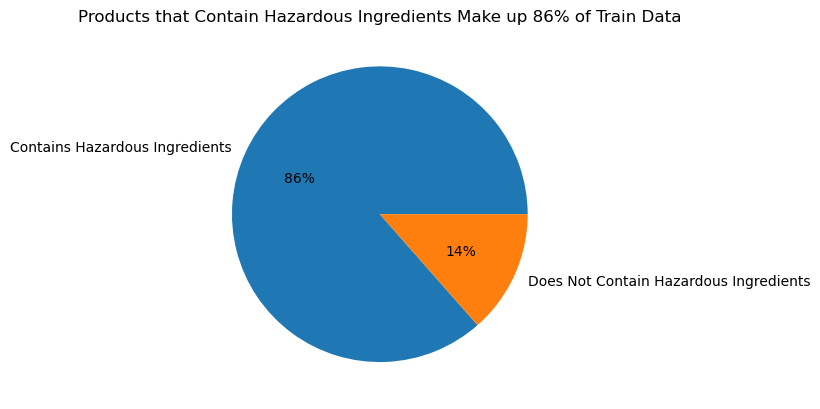

In [246]:
# visualize hazardous ingredients
labels = ['Contains Hazardous Ingredients', 'Does Not Contain Hazardous Ingredients']
plt.pie(train.has_hazard_ingredient.value_counts(), labels=labels, autopct='%.0f%%')
plt.title("Products that Contain Hazardous Ingredients Make up 86% of Train Data")
plt.show()

# Are some product types more likely to have hazardous ingredients?

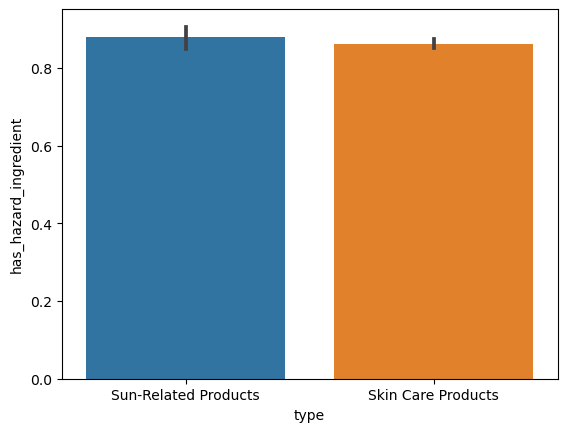

In [225]:
plt.title("")
sns.barplot(x="type", y="has_hazard_ingredient", data=train) 
plt.show()


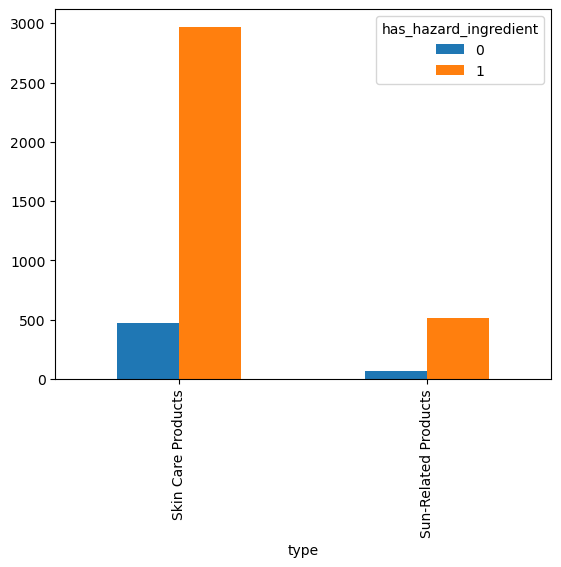

In [248]:
# create a crosstab between contract type and churn

contract_crosstab = pd.crosstab(index=train['type'], columns=train['has_hazard_ingredient'])

# visualize contract_type and churn

contract_crosstab.plot.bar()
plt.title("")
plt.show()

In [228]:
# Let's run a chi squared to compare proportions, to have more confidence
alpha = 0.05
null_hypothesis = "hazardous ingredient and product type are independent"
alternative_hypothesis = "there is a relationship between hazardous ingredient and product type"

# Setup a crosstab of observed survival to pclass
observed = pd.crosstab(train.has_hazard_ingredient, train.type)

chi2, p, degf, expected = stats.chi2_contingency(observed)

if p < alpha:
    print("Reject the null hypothesis that", null_hypothesis)
    print("Sufficient evidence to move forward understanding that", alternative_hypothesis)
else:
    print("Fail to reject the null")
    print("Insufficient evidence to reject the null")
p


Fail to reject the null
Insufficient evidence to reject the null


0.31649937474084666

# Are certain brands more likely to have hazardous ingredients?

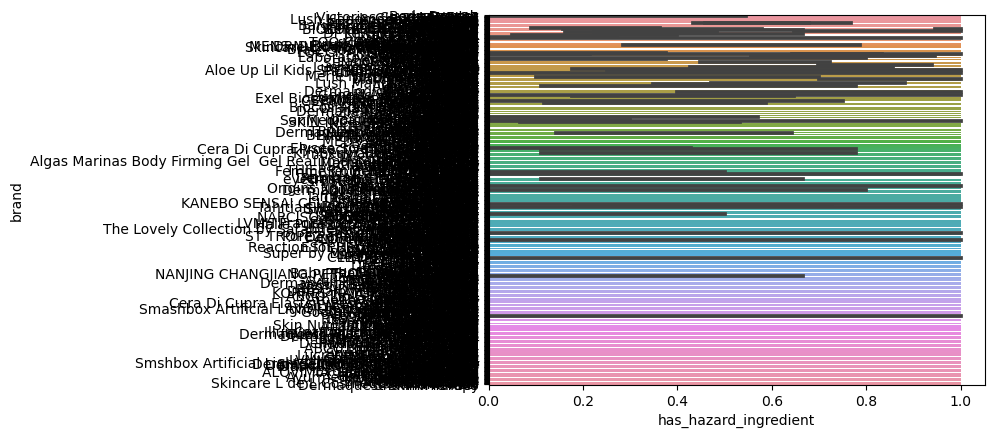

In [224]:
plt.title("")
sns.barplot(y="brand", x="has_hazard_ingredient", data=train) 
plt.show()

In [229]:
# Let's run a chi squared to compare proportions, to have more confidence
alpha = 0.05
null_hypothesis = "hazardous ingredient and brand are independent"
alternative_hypothesis = "there is a relationship between hazardous ingredient and brand"

# Setup a crosstab of observed survival to pclass
observed = pd.crosstab(train.has_hazard_ingredient, train.brand)

chi2, p, degf, expected = stats.chi2_contingency(observed)

if p < alpha:
    print("Reject the null hypothesis that", null_hypothesis)
    print("Sufficient evidence to move forward understanding that", alternative_hypothesis)
else:
    print("Fail to reject the null")
    print("Insufficient evidence to reject the null")
p


Reject the null hypothesis that hazardous ingredient and brand are independent
Sufficient evidence to move forward understanding that there is a relationship between hazardous ingredient and brand


5.670678211707391e-198

# Are certain skincare brands more likely to have hazardous ingredients?

In [230]:
skincare_only = train[train.type == 'Skin Care Products' ]

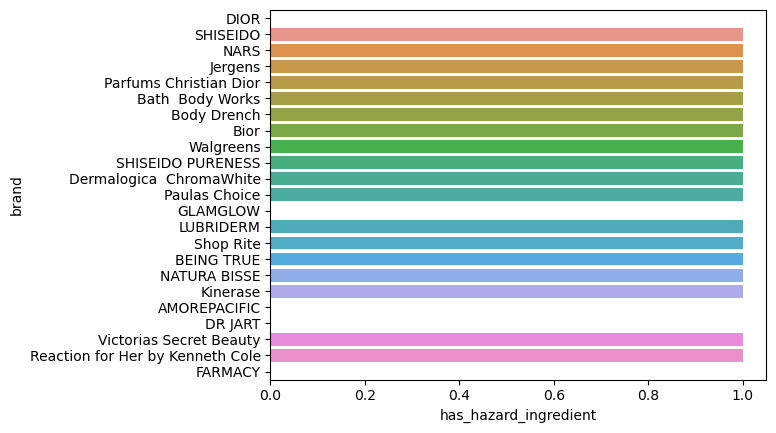

In [237]:
plt.title("")
sns.barplot(y="brand", x="has_hazard_ingredient", data=skincare_only.sample(n=25)) 
plt.show()

# Evaluation

### Encoding

In [ ]:
enc_leave = ce.Encoder(method='leave_one_out')
fm_enc_leave = enc_leave.fit_transform(feature_matrix, features, feature_matrix['value'])
fm_enc_leave

In [240]:
train.has_hazard_ingredient.value_counts()

1    3483
0     544
Name: has_hazard_ingredient, dtype: int64

In [242]:
train['baseline'] = 1

In [243]:
train

,name,brand,type,has_hazard_ingredient,baseline
6636,Lancaster Ultra Natural Bronze Care Face SPF6,Lancaster,Sun-Related Products,1,1
6797,Quick Tan MediumDark Bronzing Mousse,Body Drench,Sun-Related Products,1,1
5352,Water Bank Moisture Cream,LANEIGE,Skin Care Products,0,1
4191,PINK Polishing Body Scrub Bikini Scrub,Victorias Secret Beauty,Skin Care Products,1,1
2948,Prevage AntiAging Moisture Cream SPF 30,Prevage,Skin Care Products,1,1
...,...,...,...,...,...
2545,Beauty Rush Coconut Craze Body Glimmer Swirl C...,Victorias Secret Beauty,Skin Care Products,1,1
2744,Olay Fresh Effects Out of This Swirled Deep Po...,Olay,Skin Care Products,1,1
4293,Shawn Mendes Signature Body Lotion,Shawn Mendes,Skin Care Products,1,1
556,Skin Perfecting Serum,purminerals,Skin Care Products,1,1


In [257]:
X_train = train.drop(columns=['has_hazard_ingredient', 'baseline'])
y_train = train.has_hazard_ingredient

X_val = validate.drop(columns='has_hazard_ingredient')
y_val = validate.has_hazard_ingredient

X_test = test.drop(columns='has_hazard_ingredient')
y_test = test.has_hazard_ingredient

In [261]:
# create model
clf = DecisionTreeClassifier(max_depth=3, random_state=311)

# fit the model
clf = clf.fit(X_train, y_train)

ValueError: could not convert string to float: 'Lancaster Ultra Natural Bronze Care Face SPF6'